In [1]:
import numpy as np
from coord import GGS
from ellipsoid import WGS84

# Redefining functions
geodetic2spherical = GGS().geodetic2spherical
geodetic2cartesian = GGS().geodetic2cartesian

In [2]:
latitude = 80.
longitude = 90.
h = 60000.

In [3]:
x, y, z = geodetic2cartesian(longitude, latitude, h)
print(x, y, z)

6.867719817299595e-11 1121583.7614700284 6318631.426209423


In [4]:
lamb, theta, r = geodetic2spherical(longitude, latitude, h)
print(np.rad2deg(lamb), np.rad2deg(theta), r)

90.0 10.065403919946787 6417402.374347005


In [12]:
print(r, WGS84().a, r - WGS84().a)

6417402.374347005 6378137.0 39265.37434700504


In [6]:
r = (x*x + y*y + z*z)**0.5
print(np.rad2deg(np.arctan(y/x)), np.rad2deg(np.arccos(z*r**(-1))), r)

90.0 10.065403919946787 6417402.374347005


In [7]:
import scipy.special as special

In [8]:
# help(special)

In [9]:
# np.info(special.sph_harm)

In [10]:
import pyshtools as pysh

In [20]:
# help(pysh)

Help on package pyshtools:

NAME
    pyshtools

DESCRIPTION
    pyshtools
    
    pyshtools is an archive of scientific routines that can be used to
    perform spherical harmonic transforms and reconstructions, rotations
    of data expressed in spherical harmonics, and multitaper spectral
    analyses on the sphere.
    
    This module imports the following classes and subpackages into the
    main namespace:
    
        SHCoeffs          : Class for spherical harmonic coefficients.
        SHGrid            : Class for global grids.
        SHWindow          : Class for localized spectral analyses.
        Slepian           : Class for Slepian functions.
        SlepianCoeffs     : Class for Slepian expansion coefficients.
        SHGravCoeffs      : Class for gravitational potential spherical harmonic
                            coefficients.
        SHGravGrid        : Class for global gridded gravitational field data.
        SHGravTensor      : Class for the gravity tensor an

In [17]:
Plm = pysh.legendre.legendre(2190,np.cos(np.linspace(-np.pi/3,np.pi/3)))

In [25]:
Plm[0].size

2191

In [19]:
Plm.shape

(2191, 2191)

/usr/local/lib/python3.7/site-packages/pyshtools/shclasses/shcoeffsgrid.py:3864: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


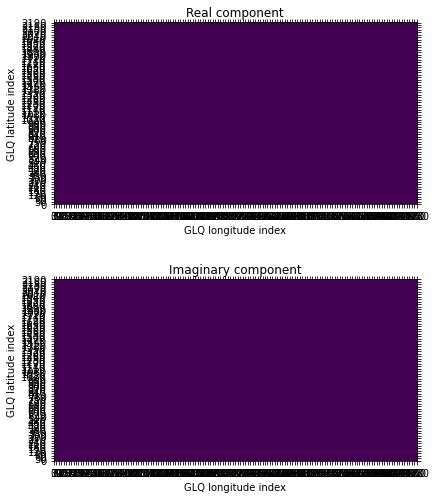

In [21]:
clm = pysh.SHCoeffs.from_zeros(2190, kind='complex')
grid = clm.expand(grid = 'GLQ', lmax=2190)
fig, ax = grid.plot()

In [22]:
clm=grid.expand()

In [23]:
clm

kind = 'complex'
normalization = '4pi'
csphase = 1
lmax = 2190
header = None